Image Pre-Processing

Saving Car.jpg to Car.jpg


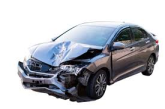

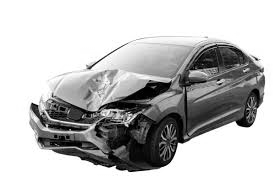

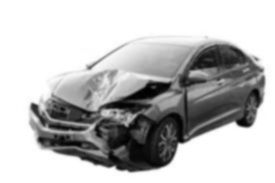

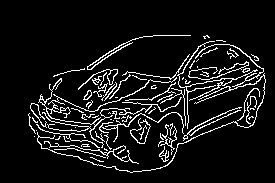

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt
uploaded = files.upload()
filename = next(iter(uploaded))
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
scale_percent = 60
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
cv2_imshow(resized)
cv2_imshow(gray)
cv2_imshow(blurred)
cv2_imshow(edges)

Number Plate Detection

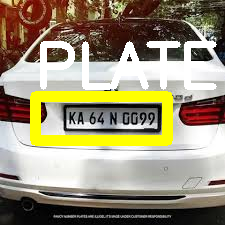

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
image = cv2.imread('/content/numberplate.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
for (x, y, w, h) in plates:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 10)
    cv2.putText(image, "PLATE", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 6)
cv2_imshow(image)



Brain tumor Segmentation

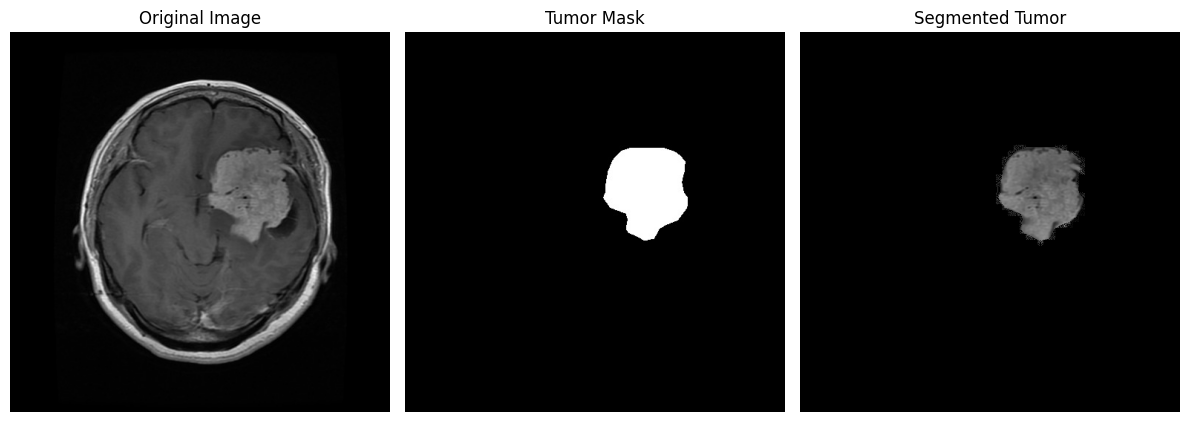

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_tumor_with_mask(original_image_path, mask_image_path):

    original = cv2.imread(original_image_path)
    mask = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

    if original is None or mask is None:
        print("Error loading images!")
        return

    mask = cv2.resize(mask, (original.shape[1], original.shape[0]))

    segmented_tumor = cv2.bitwise_and(original, original, mask=mask)

    colored_mask = np.zeros_like(original)
    colored_mask[mask > 0] = [255, 0, 0]

    blended_image = cv2.addWeighted(original, 0.7, colored_mask, 0.3, 0)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Tumor Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(segmented_tumor, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Tumor")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


original_image_path = '/content/Original.jpg'
mask_image_path = '/content/masked.jpg'

segment_tumor_with_mask(original_image_path, mask_image_path)